## PCLS: epithelial figures

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-11 17:47.


In [2]:
## path variables
adata_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/subsets/'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/'

In [3]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/epithelia_subset/'
sc.settings.figdir = fig_dir
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir + '211201_epithelia_subset_NIKLAS_annotated.h5ad')

In [5]:
## have a look at the adata object
adata

AnnData object with n_obs × n_vars = 4373 × 14597
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.4', 'cell_type', 'Aberrant Basaloid signature', 'AT1 signature', 'AT2 signature', 'Basal signature', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.4', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sub_leiden_2.4_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'con

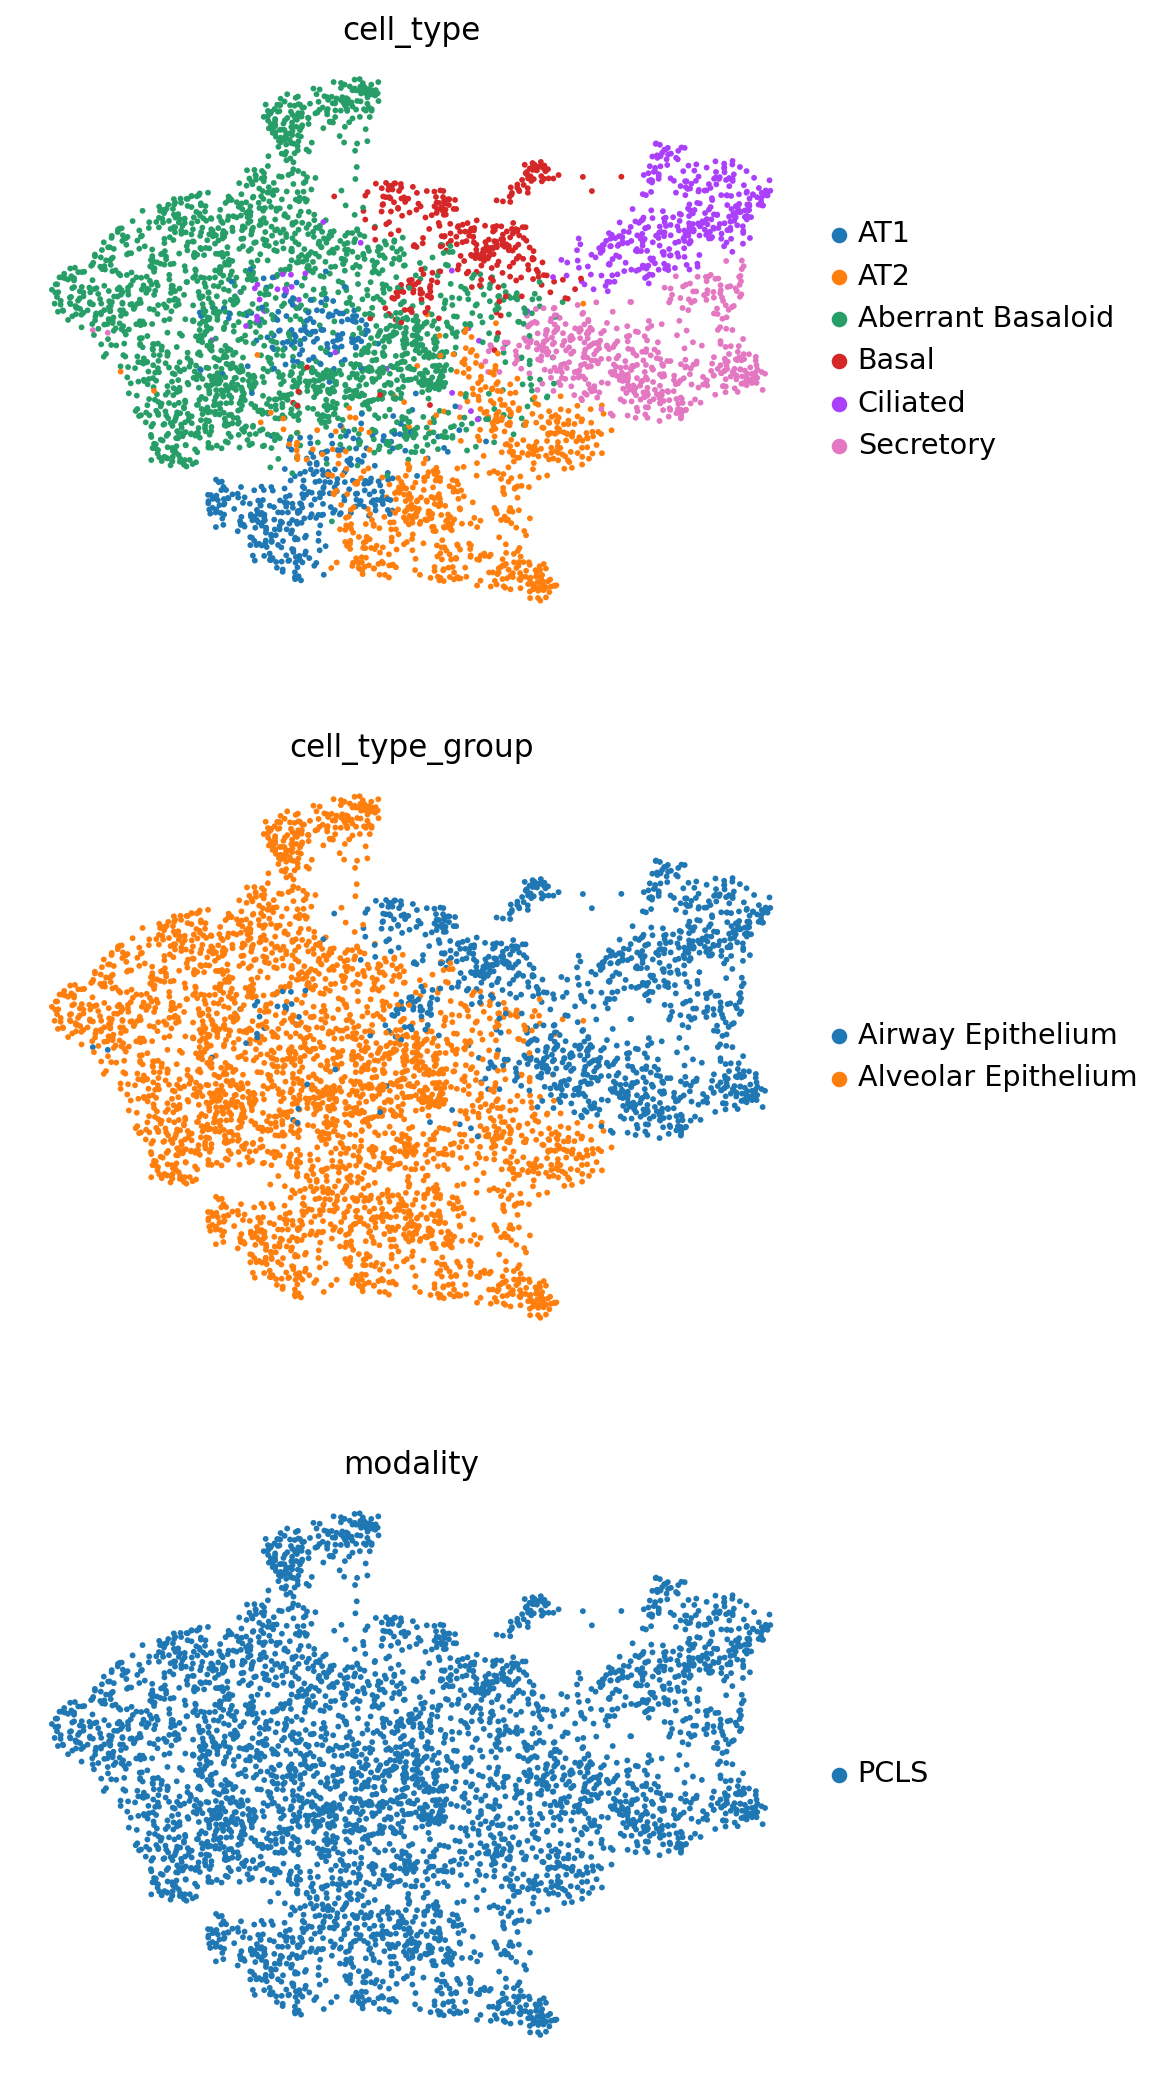

In [6]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type',
                           'cell_type_group',
                           'modality'], ncols = 1, frameon = False)

In [7]:
## subset data: we only want to visualize FC and CC
adata = adata[adata.obs.treatment.isin(['CC','FC'])].copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 2741 × 14597
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.4', 'cell_type', 'Aberrant Basaloid signature', 'AT1 signature', 'AT2 signature', 'Basal signature', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.4', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sub_leiden_2.4_colors', 'treatment_colors', 'umap', 'modality_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_cou

### Re-calculate HVGs

In [9]:
## delete all obs colums related to highly variable genes
del(adata.var['highly_variable'])
del(adata.var['highly_variable_nbatches'])
del(adata.var['highly_variable_intersection'])

In [10]:
## filter genes
sc.pp.filter_genes(adata, min_counts = 1)
sc.pp.filter_genes(adata, min_cells = 5)

filtered out 233 genes that are detected in less than 1 counts
filtered out 385 genes that are detected in less than 5 cells


extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

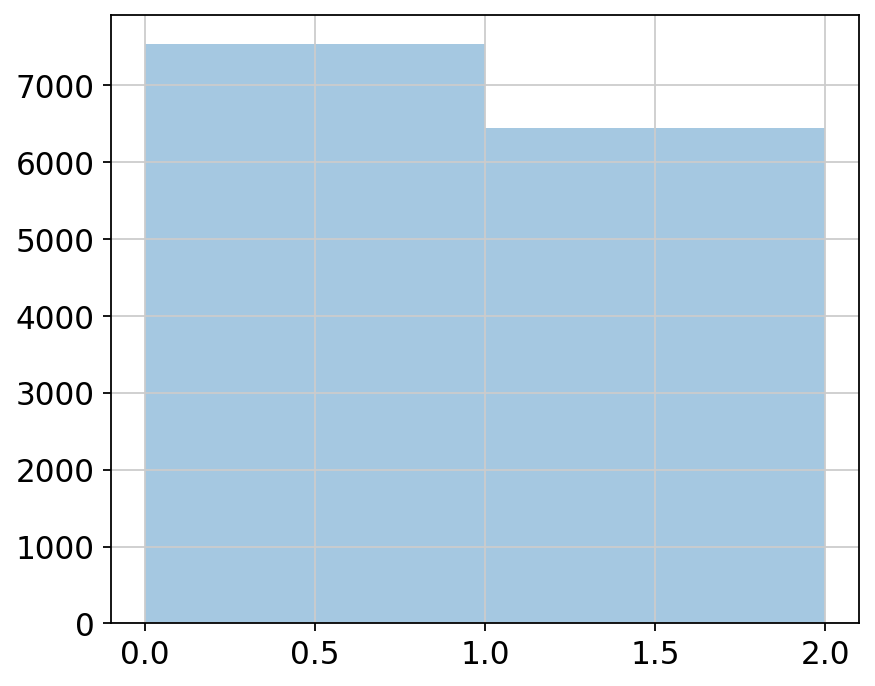

In [11]:
## compute HVGs per batch ('identifier') using seurat method
batch = 'patient'
sc.pp.highly_variable_genes(adata, min_disp = None, max_disp = None, min_mean = None, max_mean = None, 
                                batch_key = batch, n_top_genes = 4000, n_bins = 20, flavor = 'seurat', 
                                subset = False)
vartab = pd.DataFrame(adata.var['highly_variable_nbatches'], index = adata.var_names)
sb.distplot(vartab, kde = False, bins = len(np.unique(adata.obs[batch])))

In [12]:
## only consider a gene as variable if variable in at least 10 batches
thresh = 2
hvgs = vartab[vartab.highly_variable_nbatches.values >= thresh].index
print('%s Genes kept, variable in at least %s samples' %(len(hvgs), thresh))

1555 Genes kept, variable in at least 2 samples


In [13]:
## remove cell cycle genes (MOUSE) from list of HVGs
all_cc_genes = pd.read_table('/home/niklas/data/gene_lists/macosko_cell_cycle_genes.txt', header=0)
cc_genes = np.concatenate([all_cc_genes['IG1.S'], all_cc_genes['S'], all_cc_genes['G2.M'], all_cc_genes['M'], all_cc_genes['M.G1']]).astype(str)
cc_genes = [cc_genes[i] for i in np.arange(0,len(cc_genes))]
hvgs = np.setdiff1d(hvgs, cc_genes)

In [14]:
## set HVGs
adata.var['highly_variable'] = [g in hvgs for g in adata.var_names]
## no. of resulting HVGs
sum(adata.var['highly_variable'])

1506

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


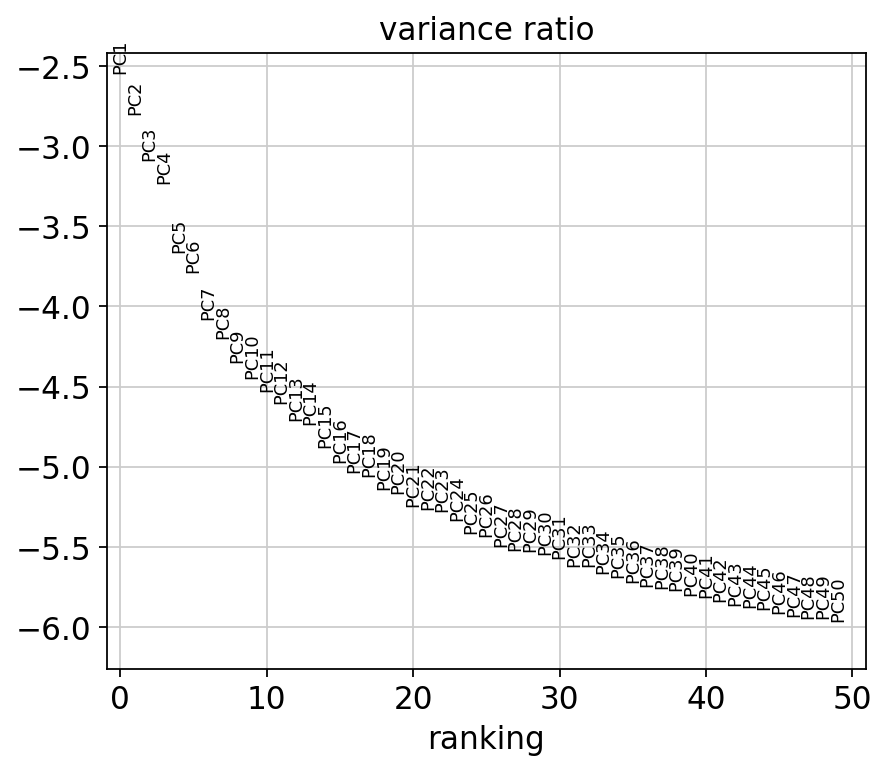

In [15]:
## PCA
sc.pp.pca(adata, use_highly_variable = True)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


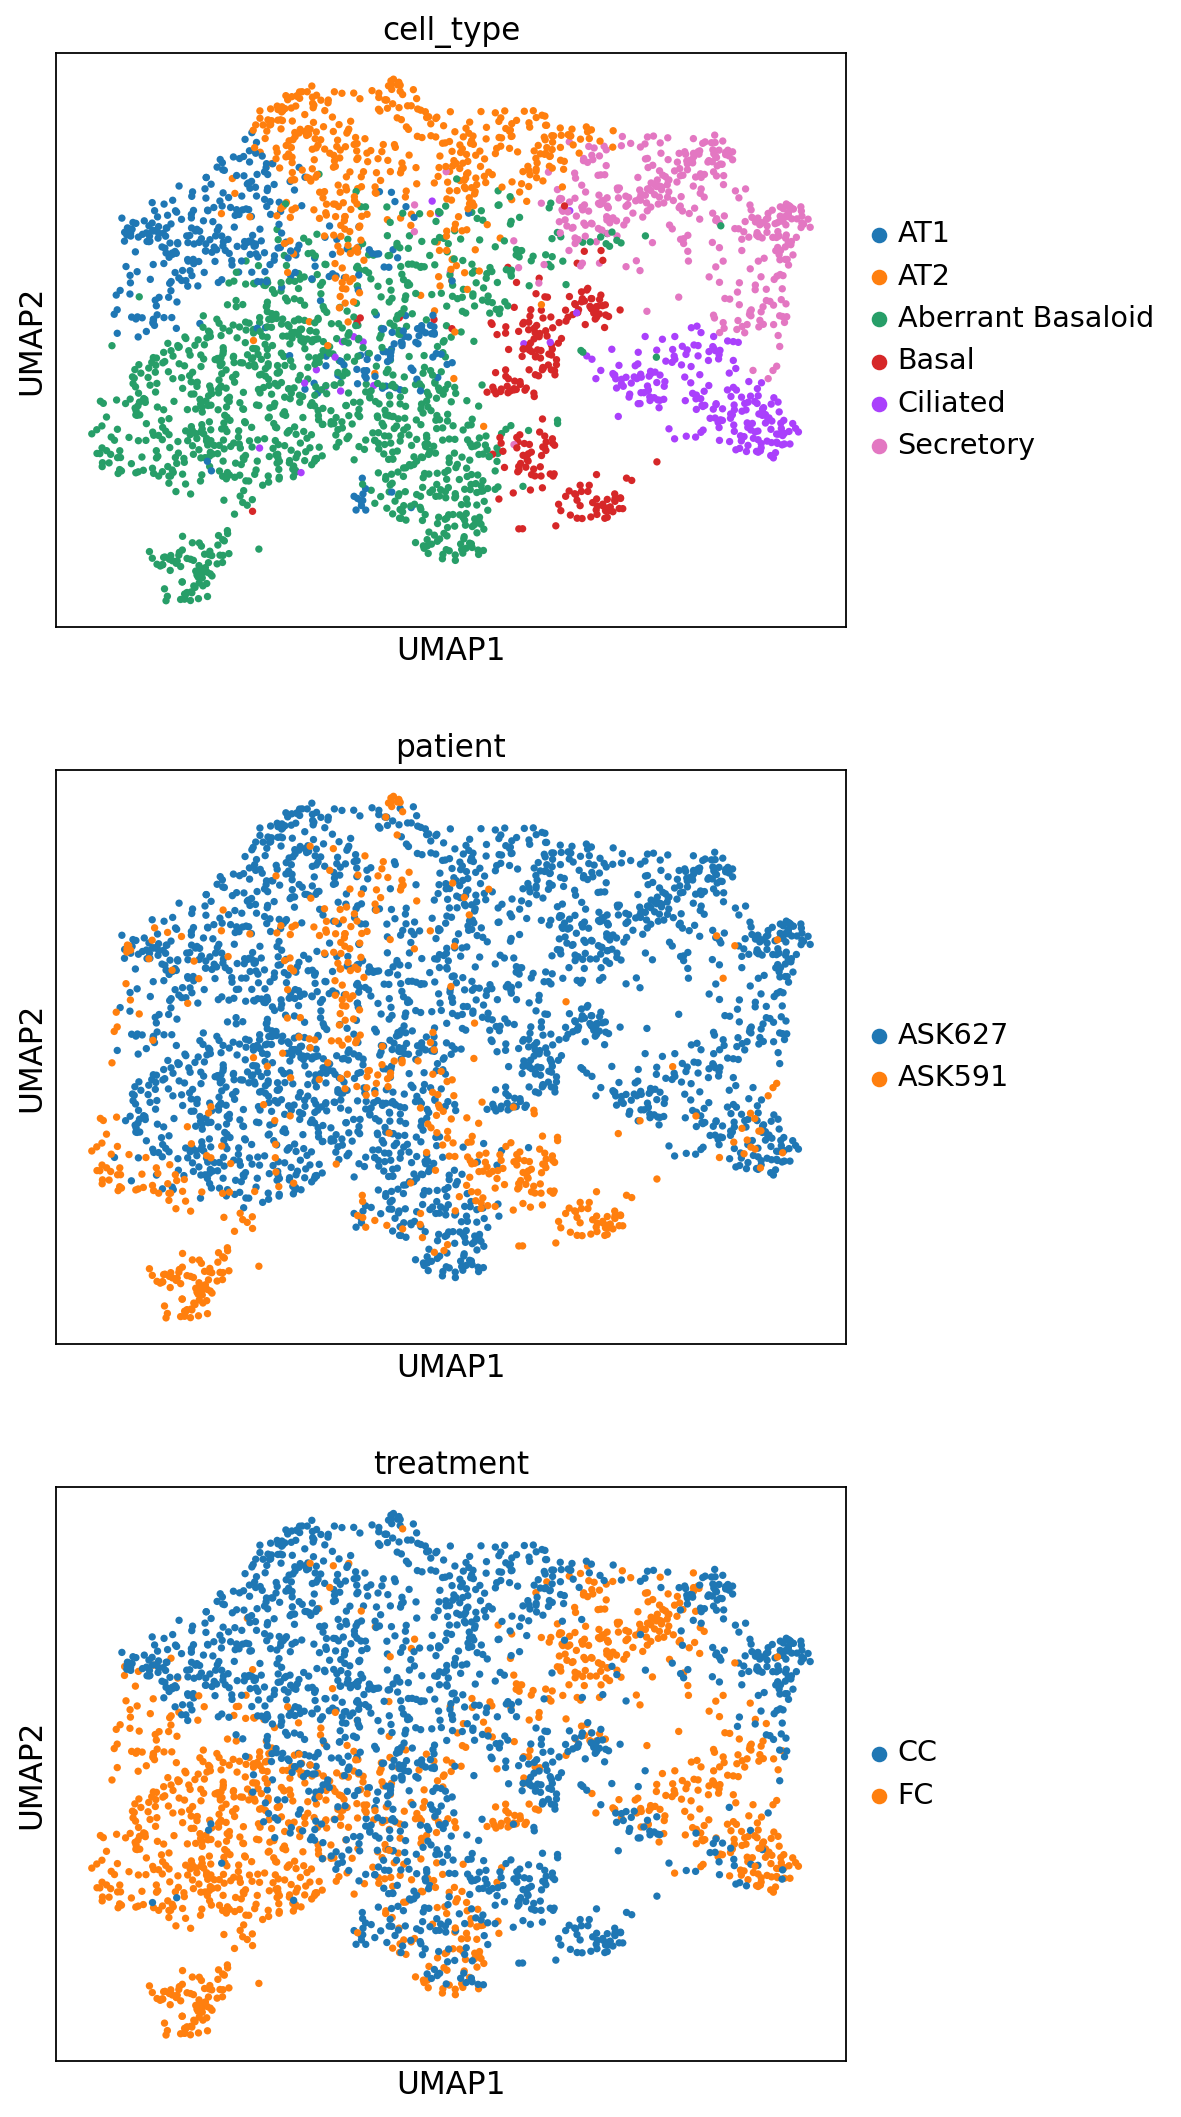

In [16]:
## graph based clustering
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 30)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['cell_type',
                           'patient',
                           'treatment'], ncols = 1)

### Save figures

In [17]:
treatment_colors = {'CC' : '#87CEFA', # CC
                    'FC' : '#32145E', # FC
                    'FC+Nintedanib' : '#D03833', # Nintedanib
                    'FC+CMP4' : '#F6991C', # CMP4
                   }

In [18]:
ct_colors = sb.color_palette()

In [19]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

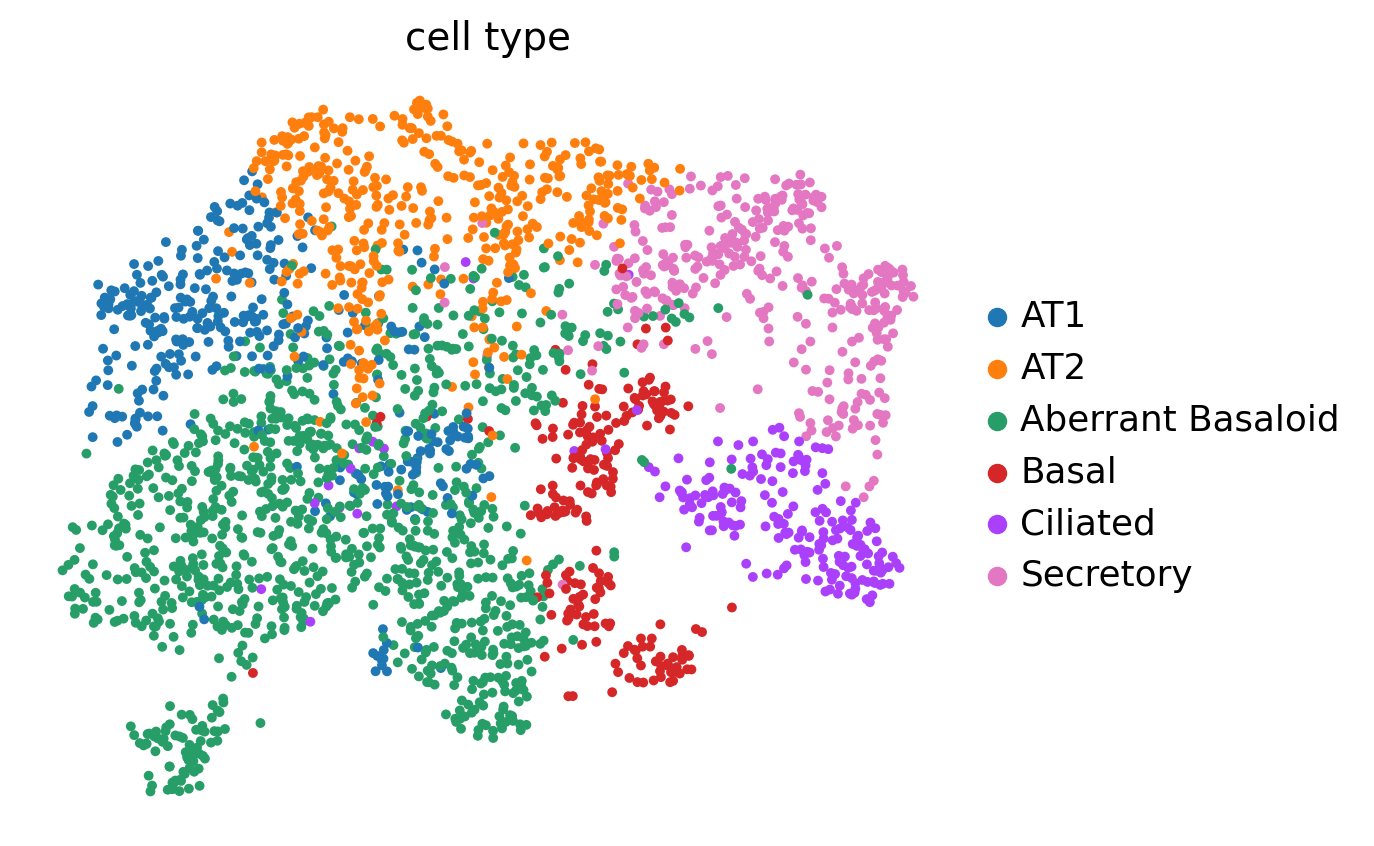

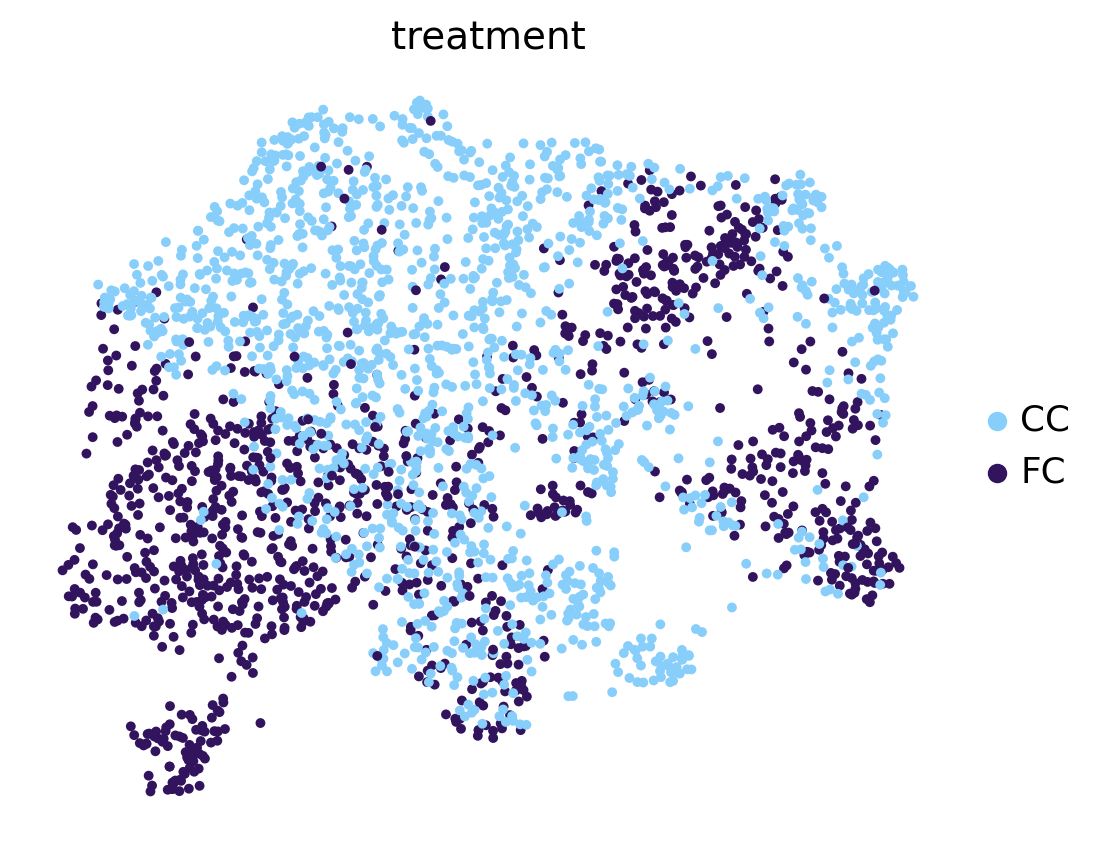

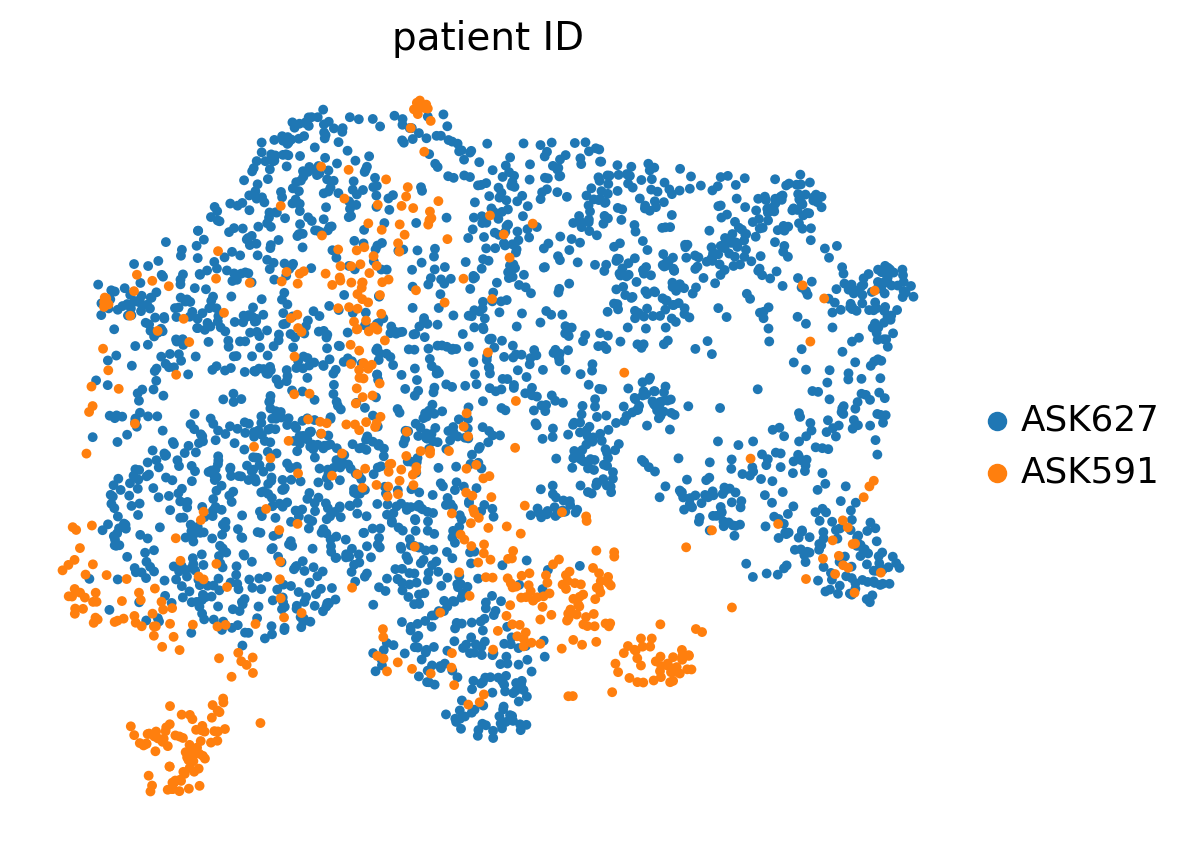

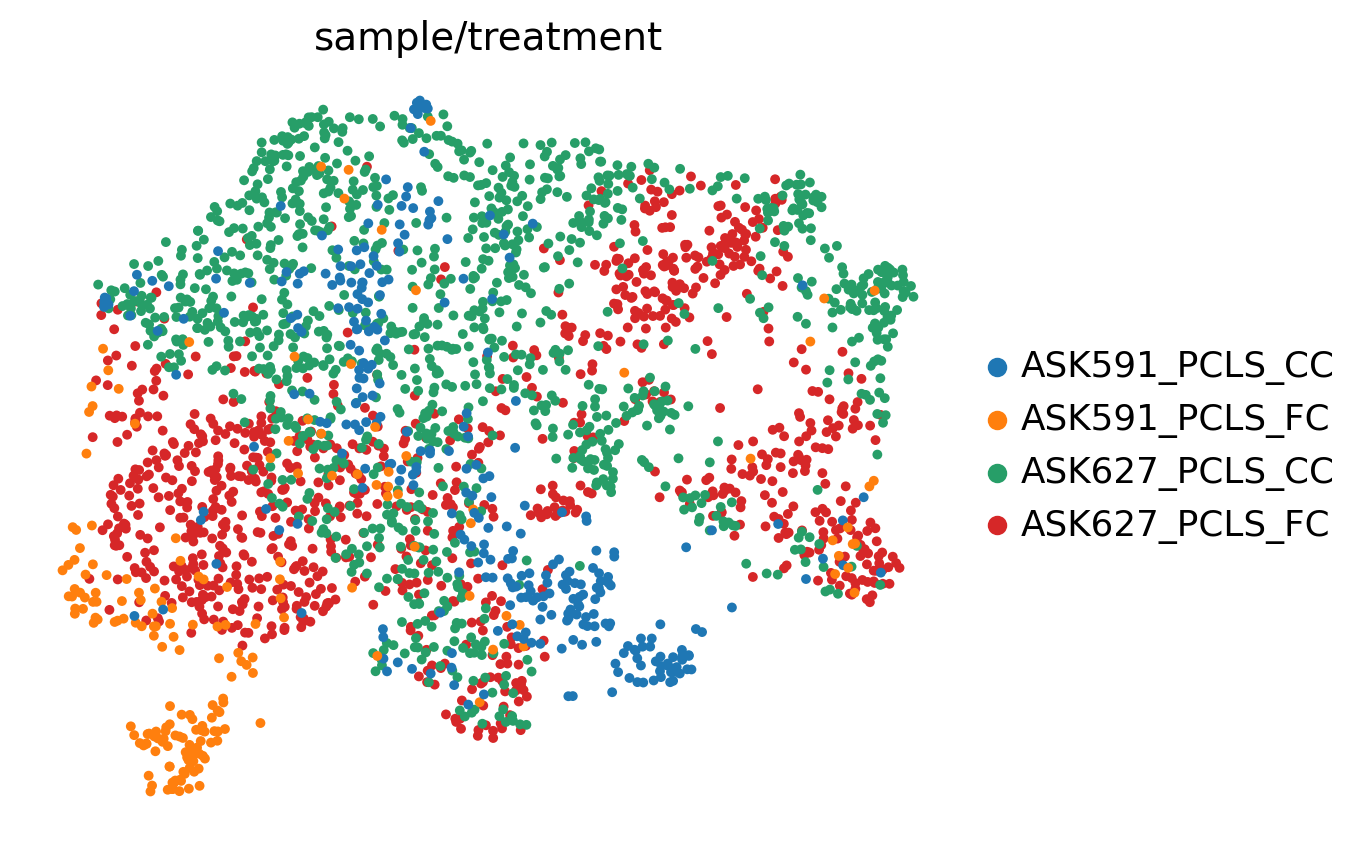

In [20]:
## cell type
sc.pl.umap(adata, color = ['cell_type'], title = 'cell type', frameon = False,
           ax = mysize(6, 5, 100), size = 50, save = '_celltype.pdf')
## treatment
sc.pl.umap(adata, color = ['treatment'], title = 'treatment', frameon = False, 
           palette = treatment_colors, 
           ax = mysize(6, 5, 100), size = 50, save = '_treatment.pdf')
## patient / sample ID
sc.pl.umap(adata, color = ['patient'], title = 'patient ID', frameon = False,
           ax = mysize(6, 5, 100), size = 50, save = '_ASK_identifier.pdf')                           
## sample/treament
sc.pl.umap(adata, color = ['name'], title = 'sample/treatment', frameon = False,
           palette = ct_colors, 
           ax = mysize(6, 5, 100), size = 50, save = '_sample_treatment.pdf')

In [21]:
## frequency table
xlabel = 'name'
cell_types_label = 'cell_type'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

AT1       AT2  Aberrant Basaloid     Basal  Ciliated  \
muc24271  0.030928  0.061856           0.814433  0.000000  0.051546   
muc24272  0.117647  0.306502           0.247678  0.291022  0.024768   

          Secretory            name  
muc24271   0.041237  ASK591_PCLS_FC  
muc24272   0.012384  ASK591_PCLS_CC

In [22]:
order = ['ASK591_PCLS_CC',
         'ASK627_PCLS_CC',
         'ASK591_PCLS_FC',
         'ASK627_PCLS_FC'
        ]

Saving Figure to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/AS
K_joint/epithelia_subset/rel_freqs.pdf

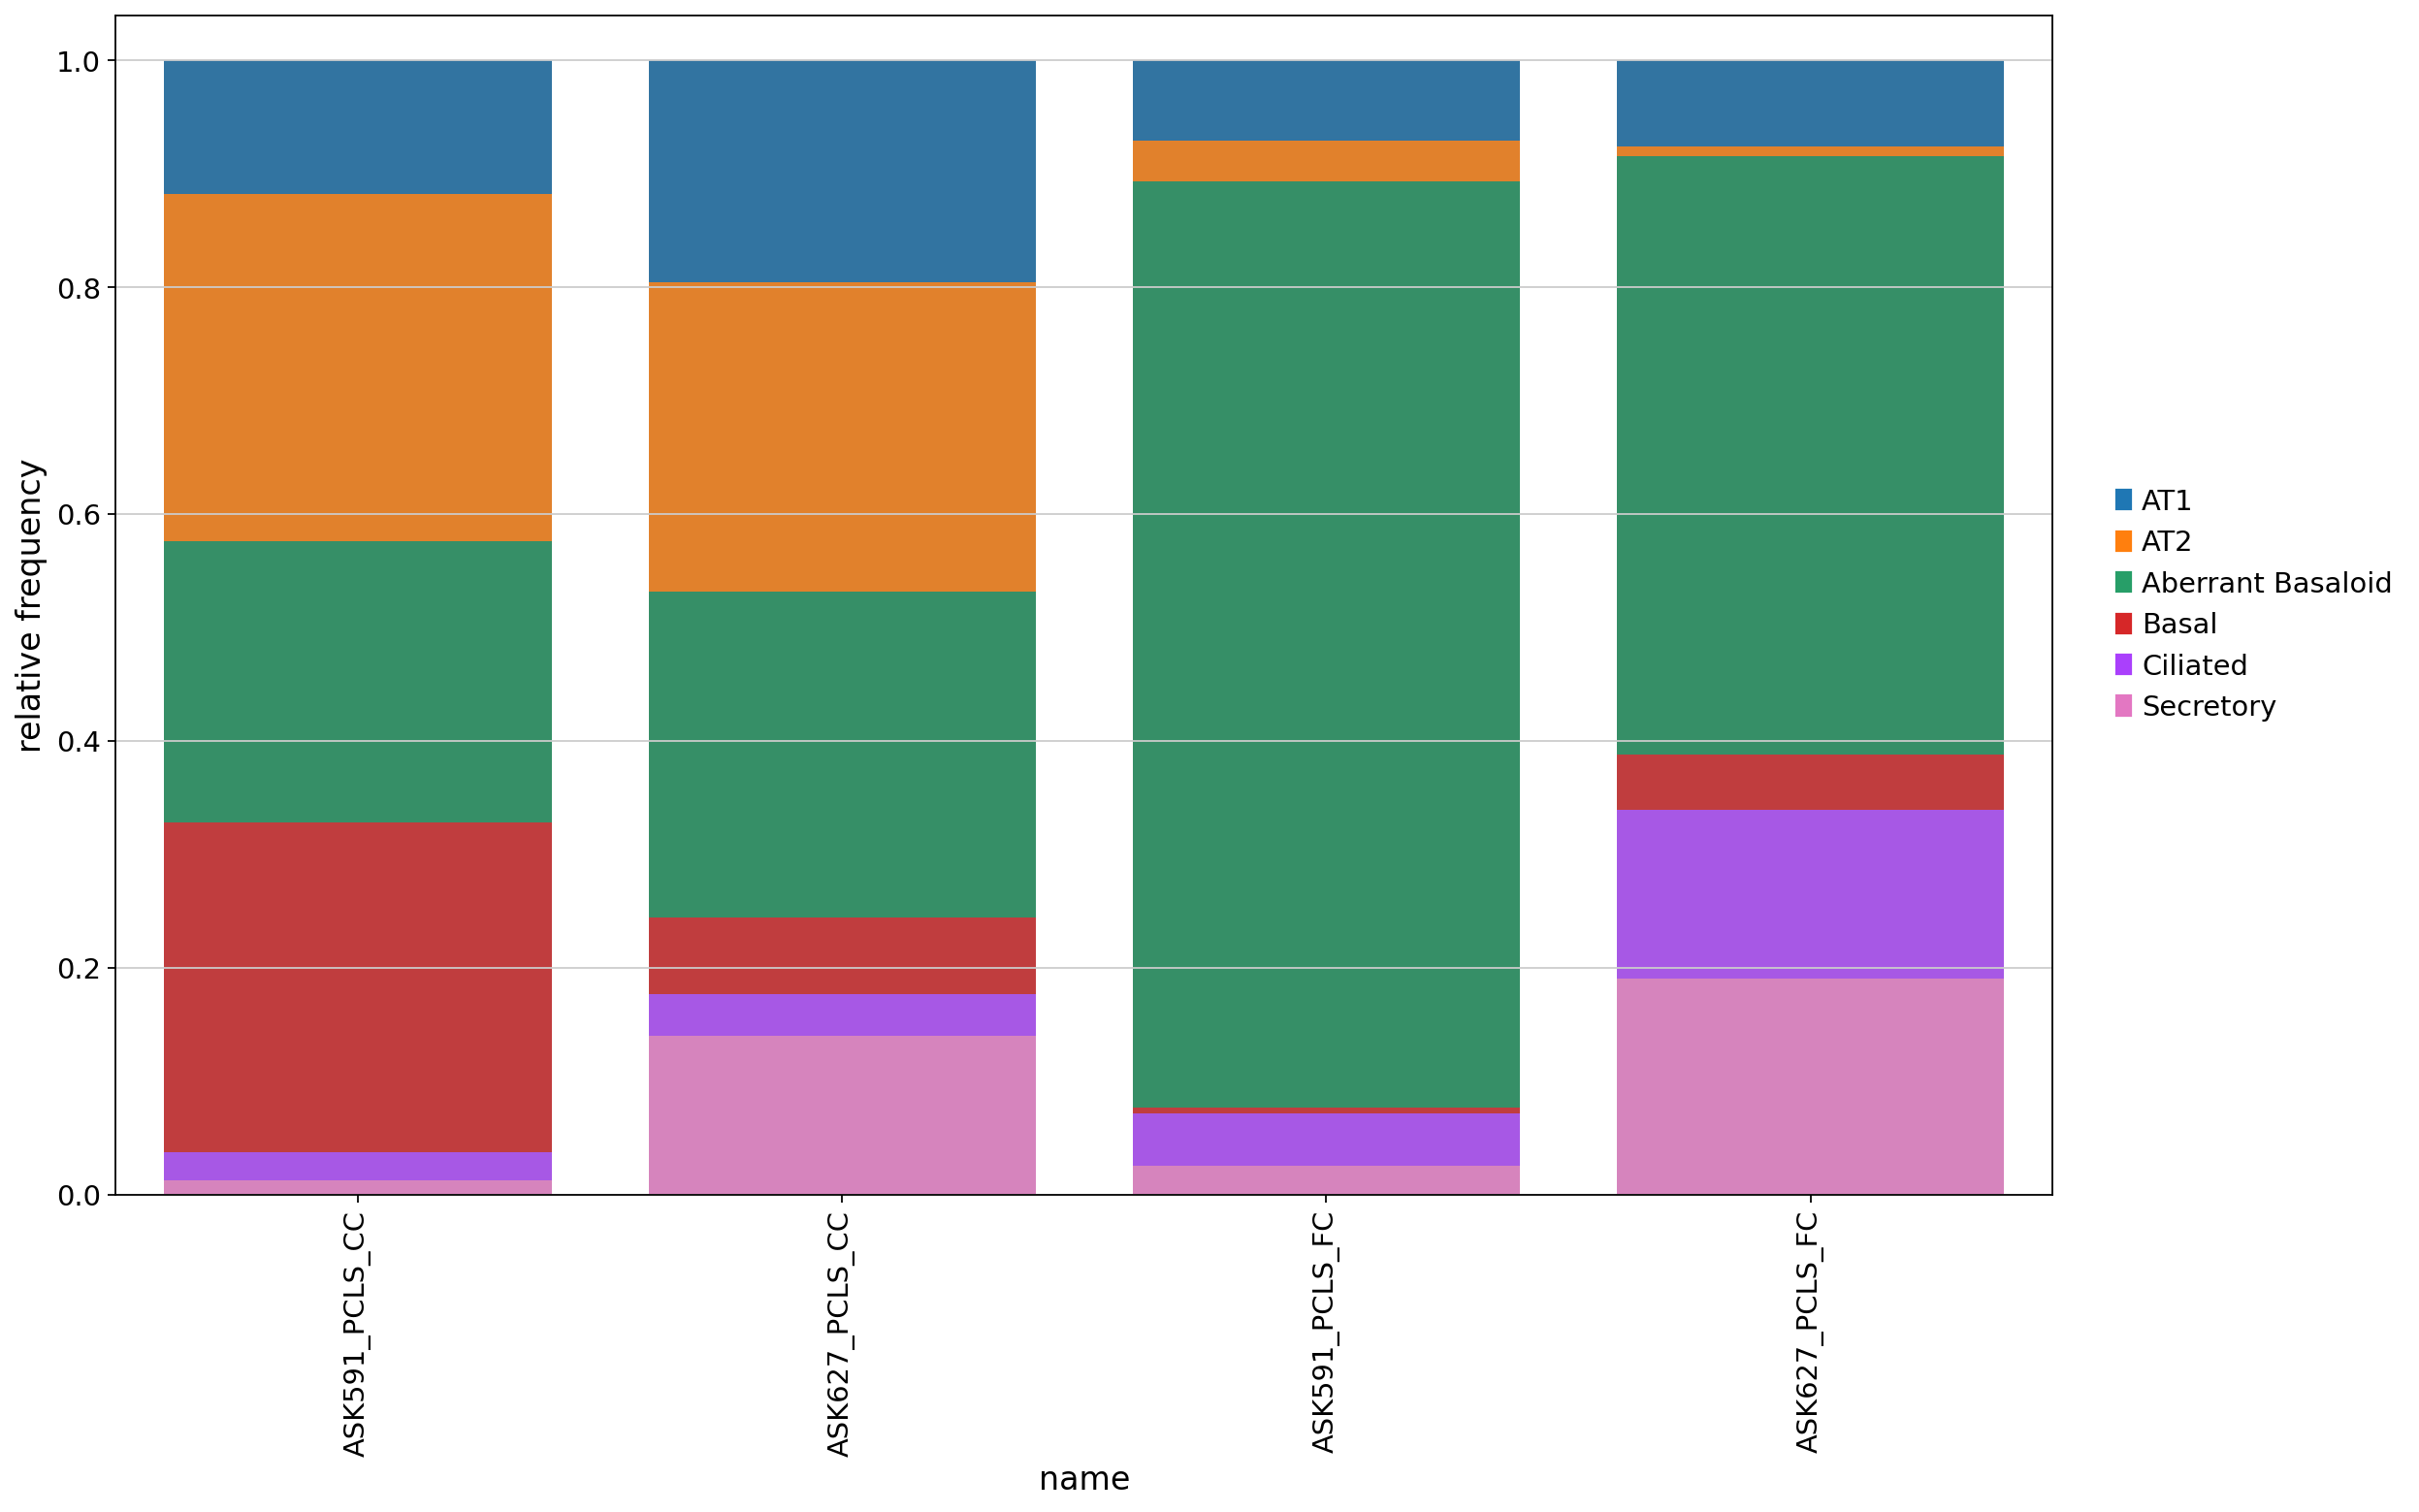

In [23]:
## cell type frequencies per treatment category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = order,
                              colors = list(cols), width = 0.8,
                              save = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/epithelia_subset/rel_freqs.pdf')

In [24]:
relFreqs

AT1       AT2  Aberrant Basaloid     Basal  Ciliated  \
muc24271  0.030928  0.061856           0.814433  0.000000  0.051546   
muc24272  0.117647  0.306502           0.247678  0.291022  0.024768   
muc24279  0.110000  0.010000           0.820000  0.010000  0.040000   
muc31175  0.075622  0.008955           0.527363  0.048756  0.149254   
muc31185  0.195724  0.273026           0.287007  0.067434  0.037007   

          Secretory            name  
muc24271   0.041237  ASK591_PCLS_FC  
muc24272   0.012384  ASK591_PCLS_CC  
muc24279   0.010000  ASK591_PCLS_FC  
muc31175   0.190050  ASK627_PCLS_FC  
muc31185   0.139803  ASK627_PCLS_CC

In [25]:
import scipy.stats as stats
#perform the Wilcoxon rank sum test
ab_cc = relFreqs[relFreqs['name'].isin(['ASK591_PCLS_CC','ASK627_PCLS_CC'])]['Aberrant Basaloid']
ab_fc = relFreqs[relFreqs['name'].isin(['ASK591_PCLS_FC','ASK627_PCLS_FC'])]['Aberrant Basaloid']
stats.ranksums(ab_cc, ab_fc)

RanksumsResult(statistic=-1.7320508075688774, pvalue=0.0832645166635504)

In [26]:
## automated heatmap
sc.tl.dendrogram(adata, groupby = 'cell_type')
sc.tl.rank_genes_groups(adata, groupby = 'cell_type', groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


In [27]:
## create marker table
result = adata.uns['rank_genes_groups']
allMarkers = []
for cluster in result['names'].dtype.names:
    current = pd.DataFrame({'gene': result['names'][cluster], 'score': result['scores'][cluster],
                            'logfoldchange': result['logfoldchanges'][cluster], 'pval': result['pvals'][cluster],
                            'pval_adj': result['pvals_adj'][cluster], 'cell_type': cluster})
    allMarkers.append(current)
allMarkers = pd.concat(allMarkers)
allMarkers.head()

gene      score  logfoldchange           pval       pval_adj cell_type
0  S100A10  21.918539       2.427620  1.729197e-106  3.125178e-102       AT1
1   S100A6  21.425081       2.247844  7.800017e-102   7.048485e-98       AT1
2    ANXA2  21.145304       2.166454   3.048213e-99   1.836345e-95       AT1
3     ACTB  18.826309       2.075286   4.597091e-79   2.077081e-75       AT1
4     HOPX  18.083656       2.315579   4.286958e-73   1.549564e-69       AT1

In [28]:
## sort marker gene table by log FC and adjusted FC
allMarkers = allMarkers.sort_values(['cell_type','logfoldchange','score'], ascending=[True,False,True])
allMarkers.head()

gene      score  logfoldchange          pval      pval_adj cell_type
6       FTL  17.283848       3.758331  6.225272e-67  1.607276e-63       AT1
386    AGER   4.139813       3.361471  3.475887e-05  5.443649e-04       AT1
149    GKN2   7.414043       3.151715  1.225058e-13  9.341976e-12       AT1
86    SFTPC   9.883747       3.068318  4.896675e-23  8.592000e-21       AT1
487  CLDN18   3.310417       2.608719  9.315698e-04  9.343097e-03       AT1

In [29]:
## save marker table
out_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/'
allMarkers.to_csv(out_dir + '220128_PCLS_human_ASK_joint_epithelia_marker_table.csv', index = False)

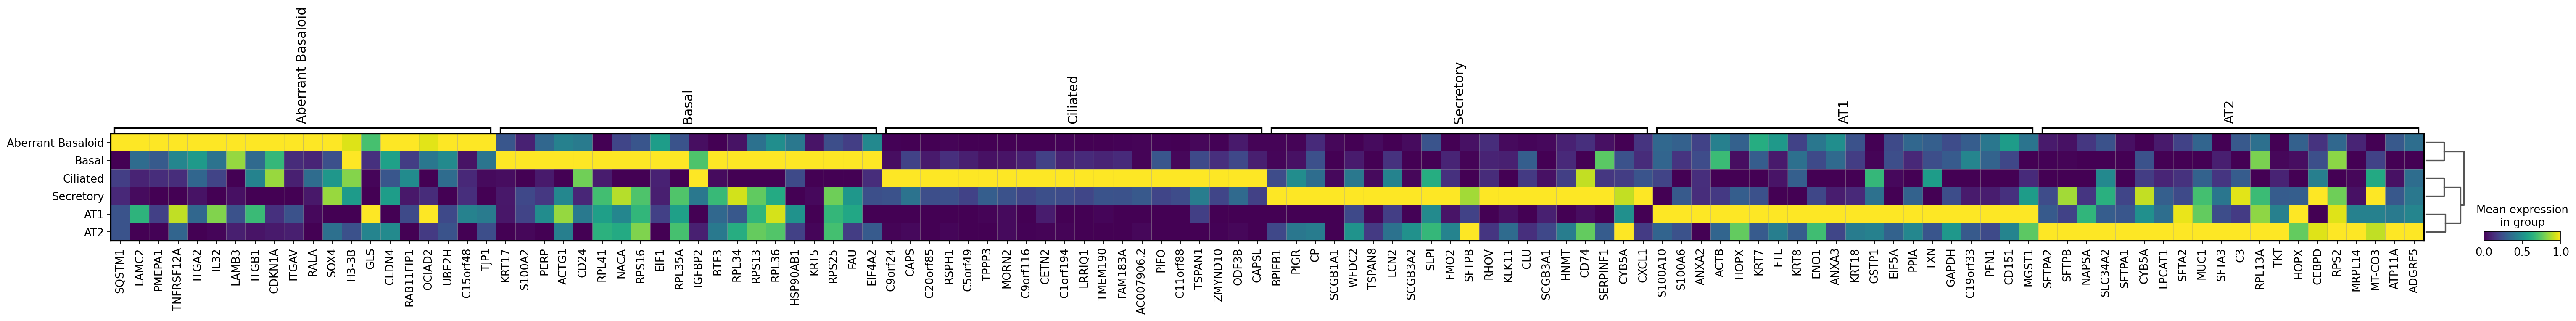

In [30]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes = 20, standard_scale = 'var', save= 'auto_markers.pdf')

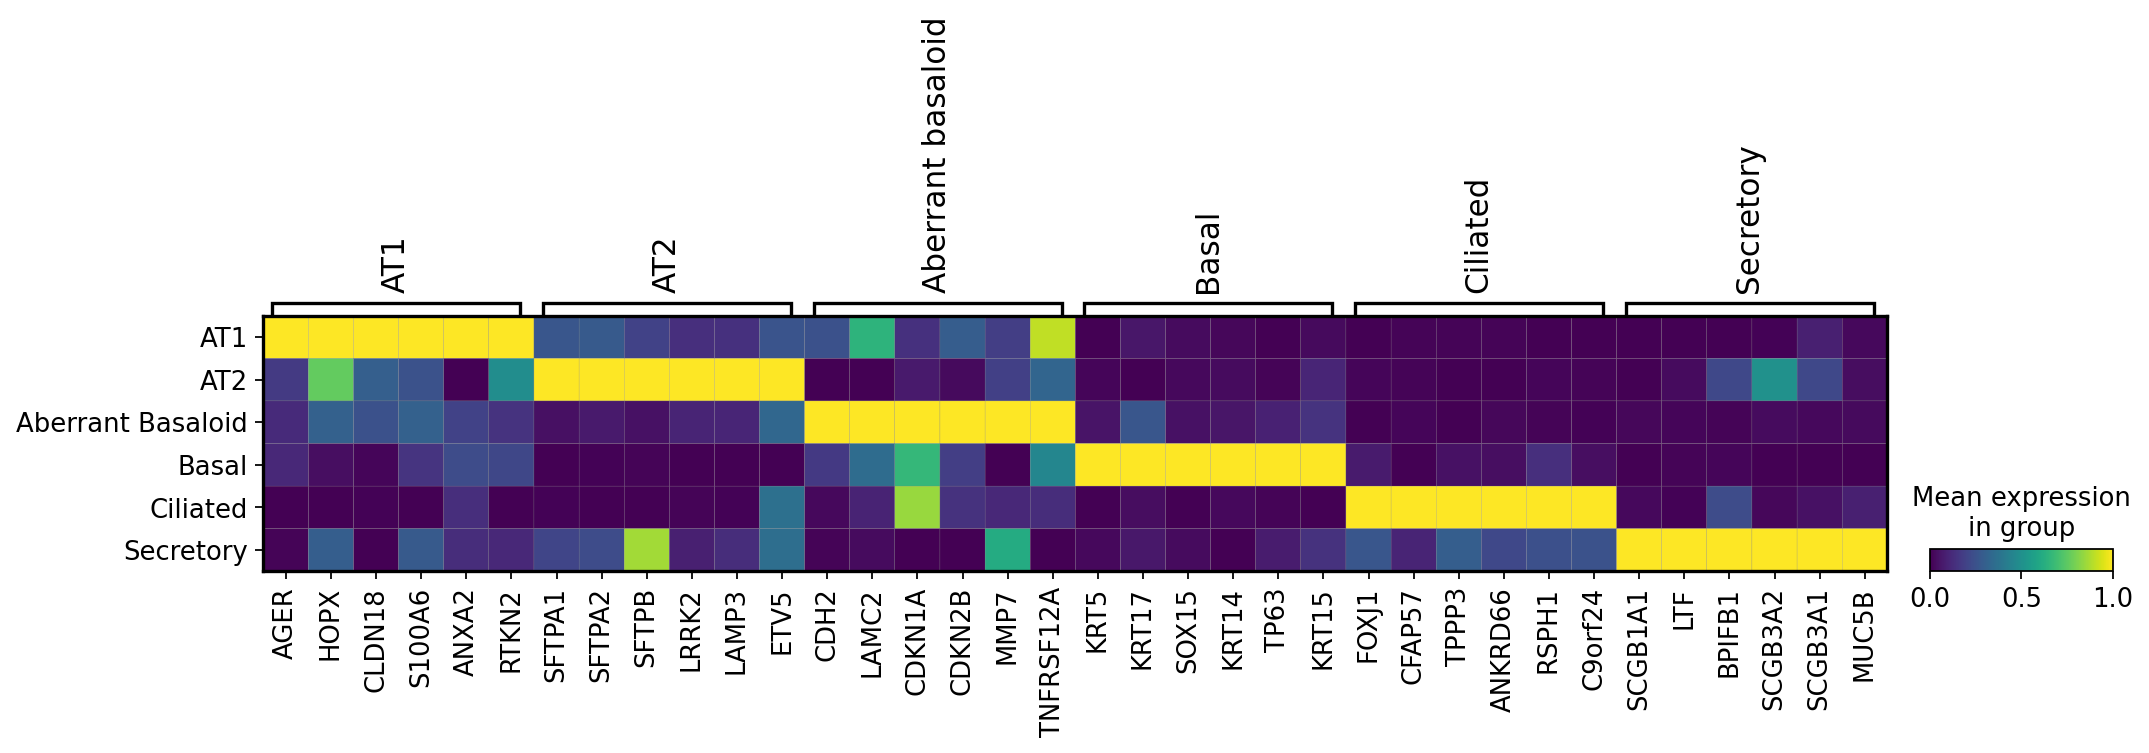

In [31]:
## custom heatmap
# matrixplot with marker genes
celltype_markers={'AT1' : ['AGER','HOPX','CLDN18','S100A6','ANXA2','RTKN2'],
                  'AT2' : ['SFTPA1','SFTPA2','SFTPB','LRRK2','LAMP3','ETV5'],
                  'Aberrant basaloid' : ['CDH2','LAMC2','CDKN1A','CDKN2B','MMP7','TNFRSF12A'],
                  'Basal' : ['KRT5','KRT17','SOX15','KRT14','TP63','KRT15'],
                  'Ciliated' : ['FOXJ1','CFAP57','TPPP3','ANKRD66','RSPH1','C9orf24',],
                  'Secretory' : ['SCGB1A1','LTF','BPIFB1','SCGB3A2','SCGB3A1','MUC5B']                
}
sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type',standard_scale='var', dendrogram=False,
                save='curated_markers.pdf')

### Scorings: Aberrant Basaloid signature

In [32]:
alv_epi = adata[adata.obs.cell_type_group.isin(['Alveolar Epithelium'])]

In [33]:
marker_folder = '/home/niklas/data/gene_lists/integrated_IPF_atlas_epithelial_markers.txt'
marker_table = pd.read_csv(marker_folder, sep = '\t', index_col = None)
marker_table.head(5)

gene       score     logFC  pval  pval_adj cell_type  pct.within  \
0  CAV1  117.355980  5.072826   0.0       0.0       AT1    0.843000   
1  EMP2  112.732550  3.595853   0.0       0.0       AT1    0.892588   
2  AGER  109.769260  5.819998   0.0       0.0       AT1    0.812161   
3  CD55   81.335976  2.597051   0.0       0.0       AT1    0.802874   
4  CAV2   79.821170  3.585567   0.0       0.0       AT1    0.693534   

   pct.outside  
0     0.139858  
1     0.466208  
2     0.094524  
3     0.391100  
4     0.154557

In [34]:
from matplotlib import colors
grey_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N=128)

In [35]:
## what to score 
cell_type = 'aberrant Basaloid'
s_name = 'Aberrant Basaloid signature'

In [36]:
score_genes = marker_table[marker_table['cell_type'] == 'aberrant Basaloid']
score_genes = score_genes[score_genes['logFC'] > 2]
score_genes = score_genes[score_genes['pct.within'] > 0.5]
score_genes = score_genes[score_genes['pct.outside'] < 0.10] ## more strict here because aberrant basaloid are so rare in vivo

In [37]:
score_genes_list = score_genes['gene'].to_list()

In [38]:
sc.tl.score_genes(alv_epi, gene_list = score_genes_list, score_name = s_name)

computing score 'Aberrant Basaloid signature'


Trying to set attribute `.obs` of view, copying.


    finished: added
    'Aberrant Basaloid signature', score of gene set (adata.obs).
    498 total control genes are used. (0:00:00)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saving to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint
/epithelia_subset/boxplot_aberrant_basaloid_score_sample.pdf

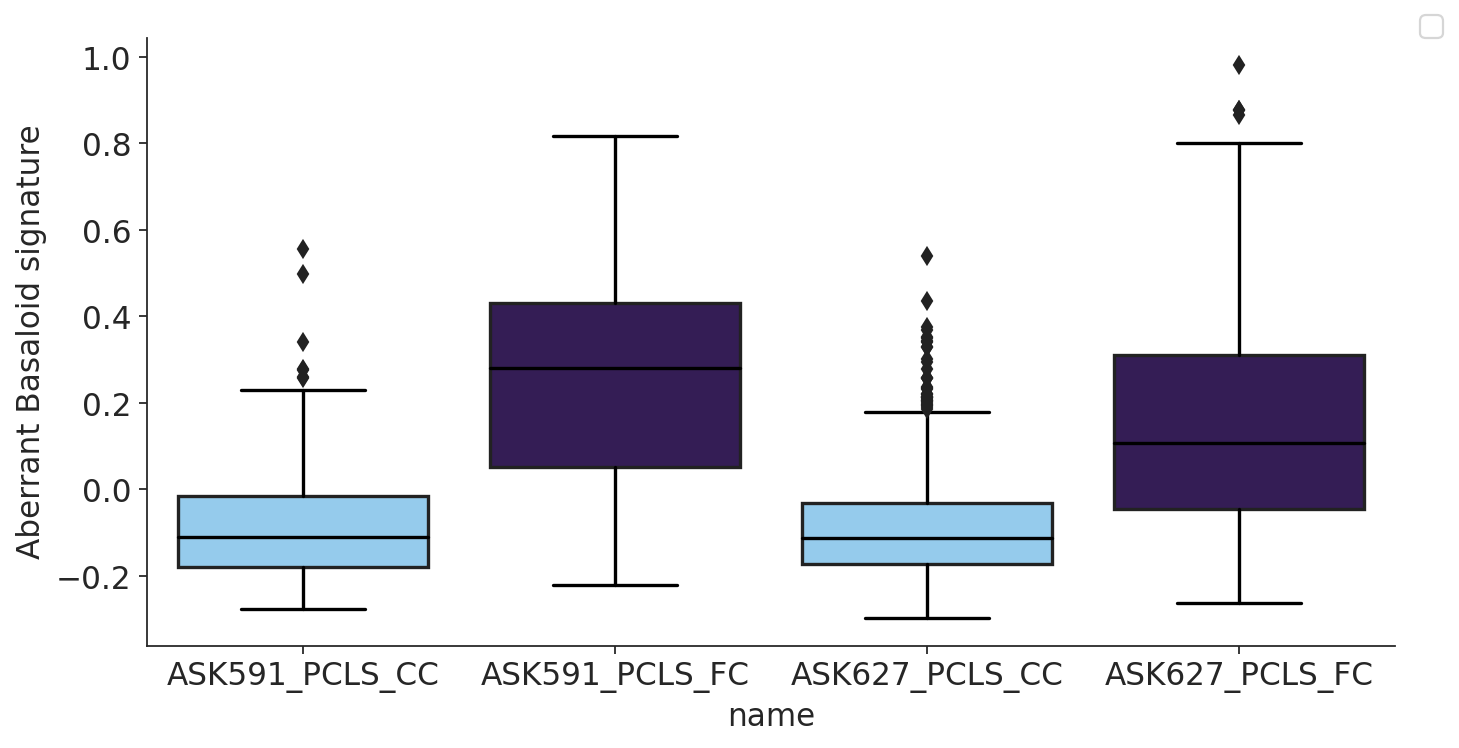

In [39]:
xlabel = 'name'
cols = alv_epi.uns['%s_colors' %'treatment']
score = sc.get.obs_df(alv_epi, keys = [s_name, xlabel], layer = None, use_raw = True)
sct.plot.gene_boxplot(score, score = s_name, xlabel = xlabel, figsize = (10, 5), palette = cols, width = 0.8,
                      save = fig_dir + 'boxplot_aberrant_basaloid_score_sample.pdf')


In [40]:
ask627_score_fc = score[score['name'].isin(['ASK627_PCLS_FC'])]['Aberrant Basaloid signature'].to_list()
ask627_score_cc = score[score['name'].isin(['ASK627_PCLS_CC'])]['Aberrant Basaloid signature'].to_list()
ask591_score_fc = score[score['name'].isin(['ASK591_PCLS_FC'])]['Aberrant Basaloid signature'].to_list()
ask591_score_cc = score[score['name'].isin(['ASK591_PCLS_CC'])]['Aberrant Basaloid signature'].to_list()

In [41]:
import scipy.stats as stats
#perform the Mann-Whitney U test for ASK591
stats.mannwhitneyu(ask591_score_cc, ask591_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=5045.0, pvalue=1.3835765135843679e-37)

In [42]:
#perform the Mann-Whitney U test for ASK627
stats.mannwhitneyu(ask627_score_cc, ask627_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=106903.0, pvalue=7.515050062596085e-95)

### Scorings: AT2 signature

In [43]:
score_genes = marker_table[marker_table['cell_type'] == 'AT2']
score_genes = score_genes[score_genes['logFC'] > 2]
score_genes = score_genes[score_genes['pct.within'] > 0.5]
score_genes = score_genes[score_genes['pct.outside'] < 0.25]

In [44]:
score_genes_list = score_genes['gene'].to_list()

In [45]:
s_name = 'AT2 signature'
sc.tl.score_genes(alv_epi, gene_list = score_genes_list, score_name = s_name)

computing score 'AT2 signature'
    finished: added
    'AT2 signature', score of gene set (adata.obs).
    494 total control genes are used. (0:00:00)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saving to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint
/epithelia_subset/boxplot_AT2_score_sample.pdf

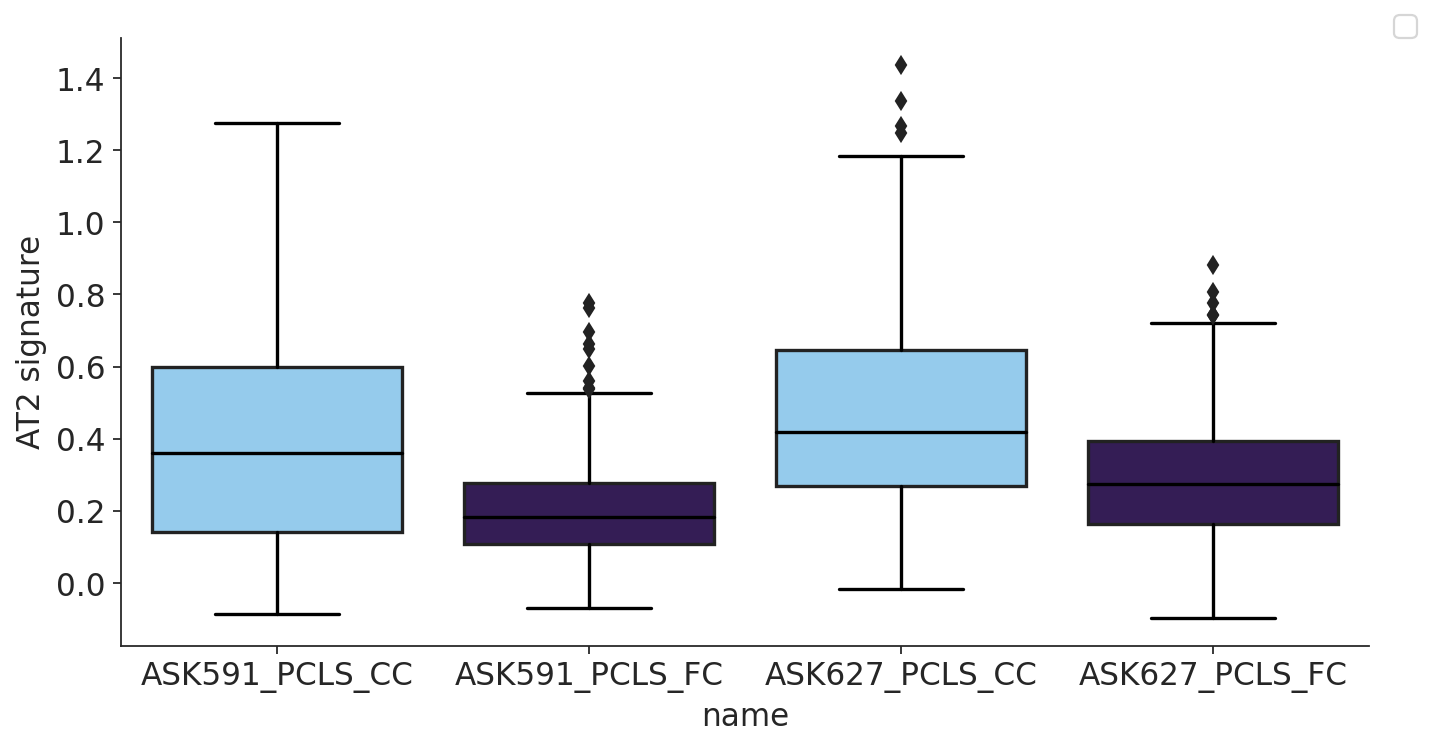

In [46]:
xlabel = 'name'
cols = alv_epi.uns['%s_colors' %'treatment']
score = sc.get.obs_df(alv_epi, keys = [s_name, xlabel], layer = None, use_raw = True)
sct.plot.gene_boxplot(score, score = s_name, xlabel = xlabel, figsize = (10, 5), palette = cols, width = 0.8,
                      save = fig_dir + 'boxplot_AT2_score_sample.pdf')

In [47]:
ask627_score_fc = score[score['name'].isin(['ASK627_PCLS_FC'])]['AT2 signature'].to_list()
ask627_score_cc = score[score['name'].isin(['ASK627_PCLS_CC'])]['AT2 signature'].to_list()
ask591_score_fc = score[score['name'].isin(['ASK591_PCLS_FC'])]['AT2 signature'].to_list()
ask591_score_cc = score[score['name'].isin(['ASK591_PCLS_CC'])]['AT2 signature'].to_list()

In [48]:
#perform the Mann-Whitney U test for ASK591
stats.mannwhitneyu(ask591_score_cc, ask591_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=26631.0, pvalue=1.9810583643322235e-09)

In [49]:
#perform the Mann-Whitney U test for ASK627
stats.mannwhitneyu(ask627_score_cc, ask627_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=398941.0, pvalue=1.2725226093438763e-42)

### Feature plots for Supplement

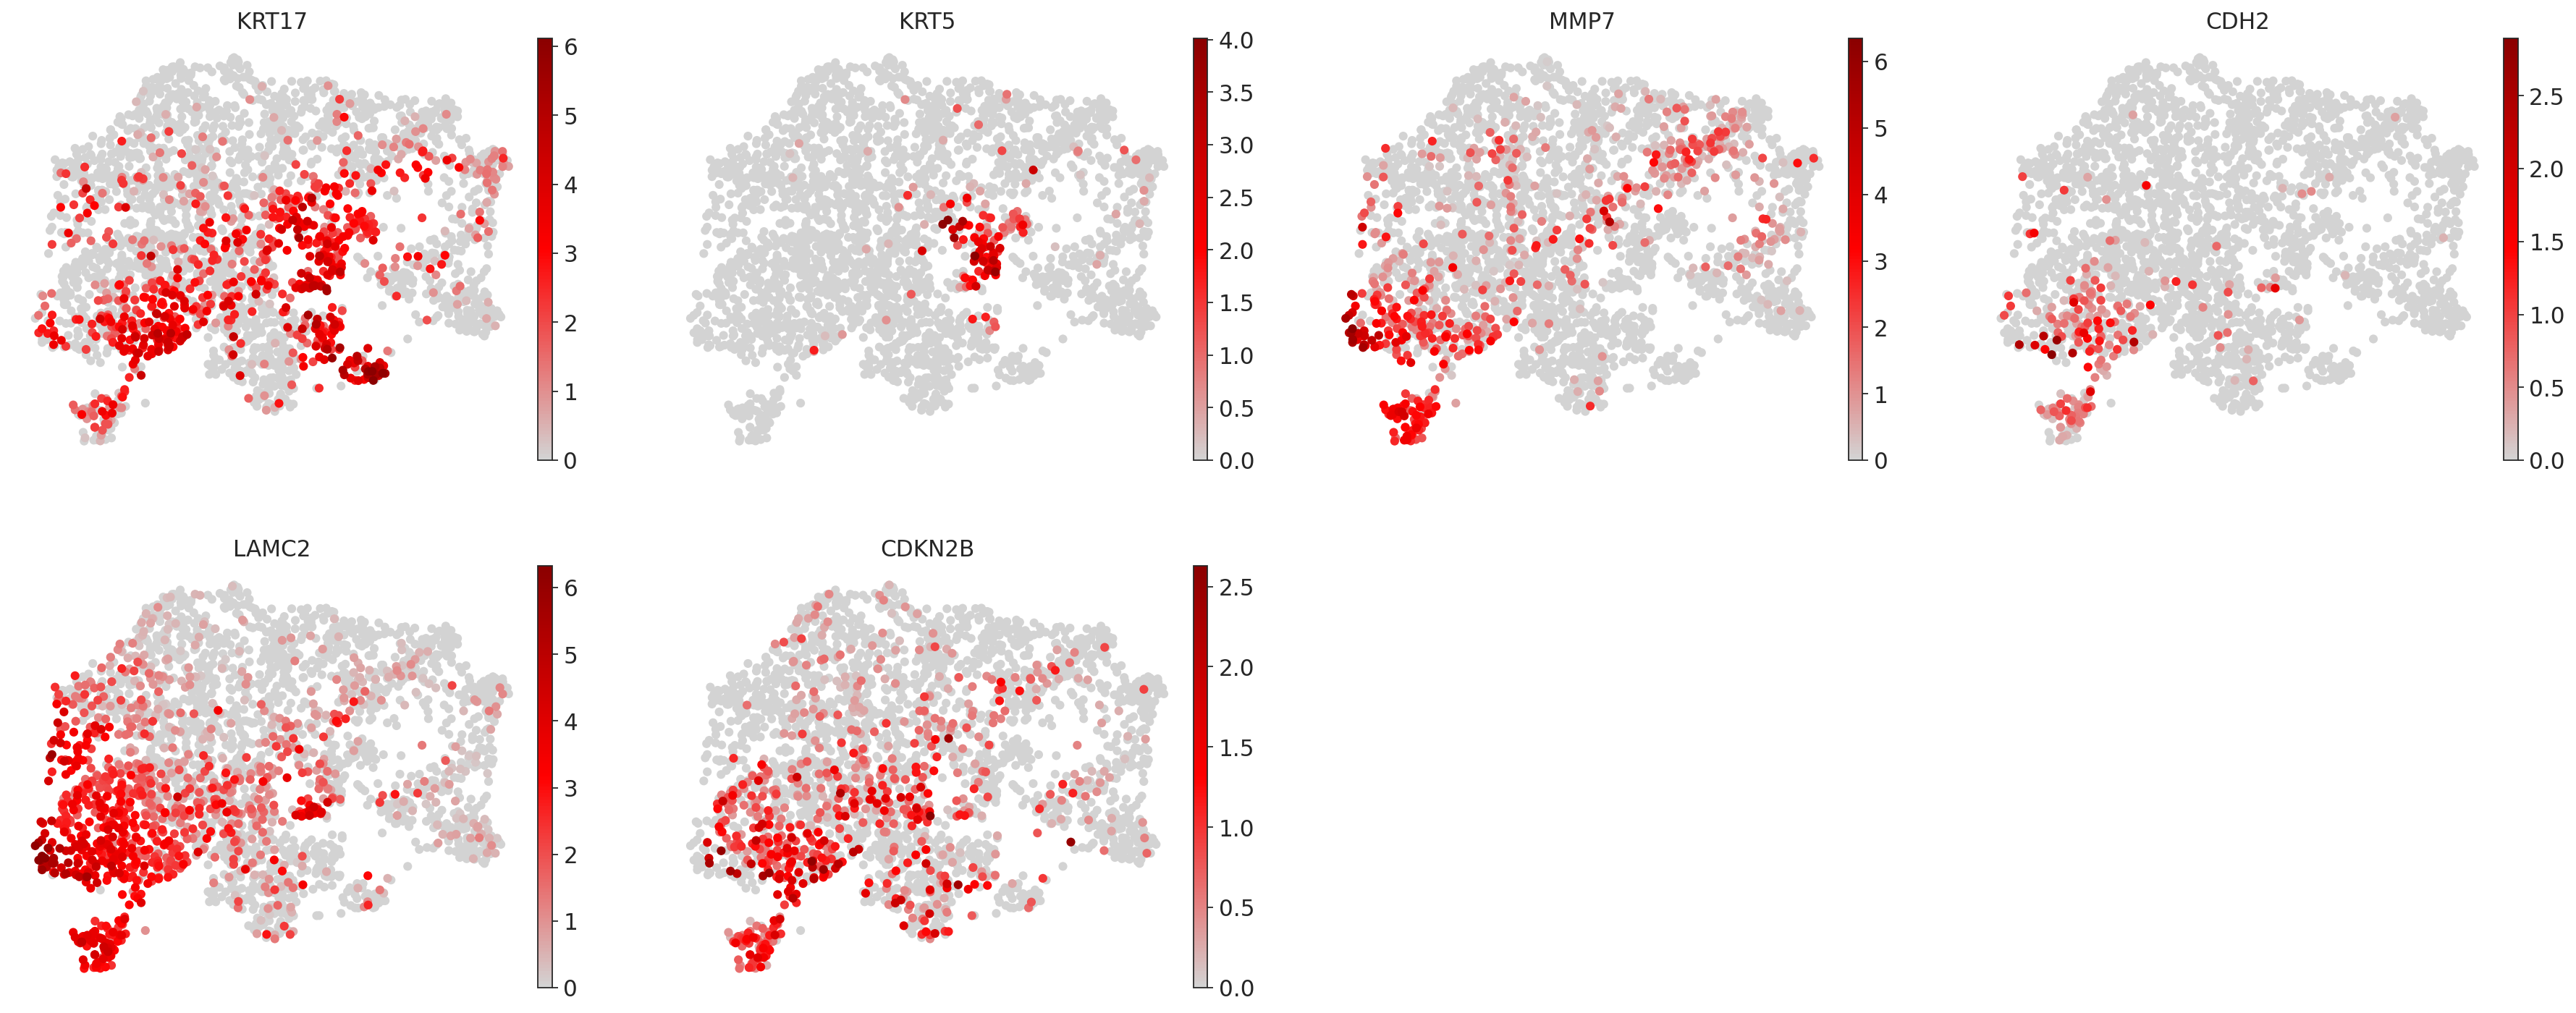

In [50]:
sc.pl.umap(adata, color = ['KRT17','KRT5','MMP7','CDH2','LAMC2','CDKN2B'], 
           frameon = False, cmap = grey_red, ncols = 4,
           size = 120, vmin = 0,
           save = '_aberrant_basaloid_marker_1.pdf')

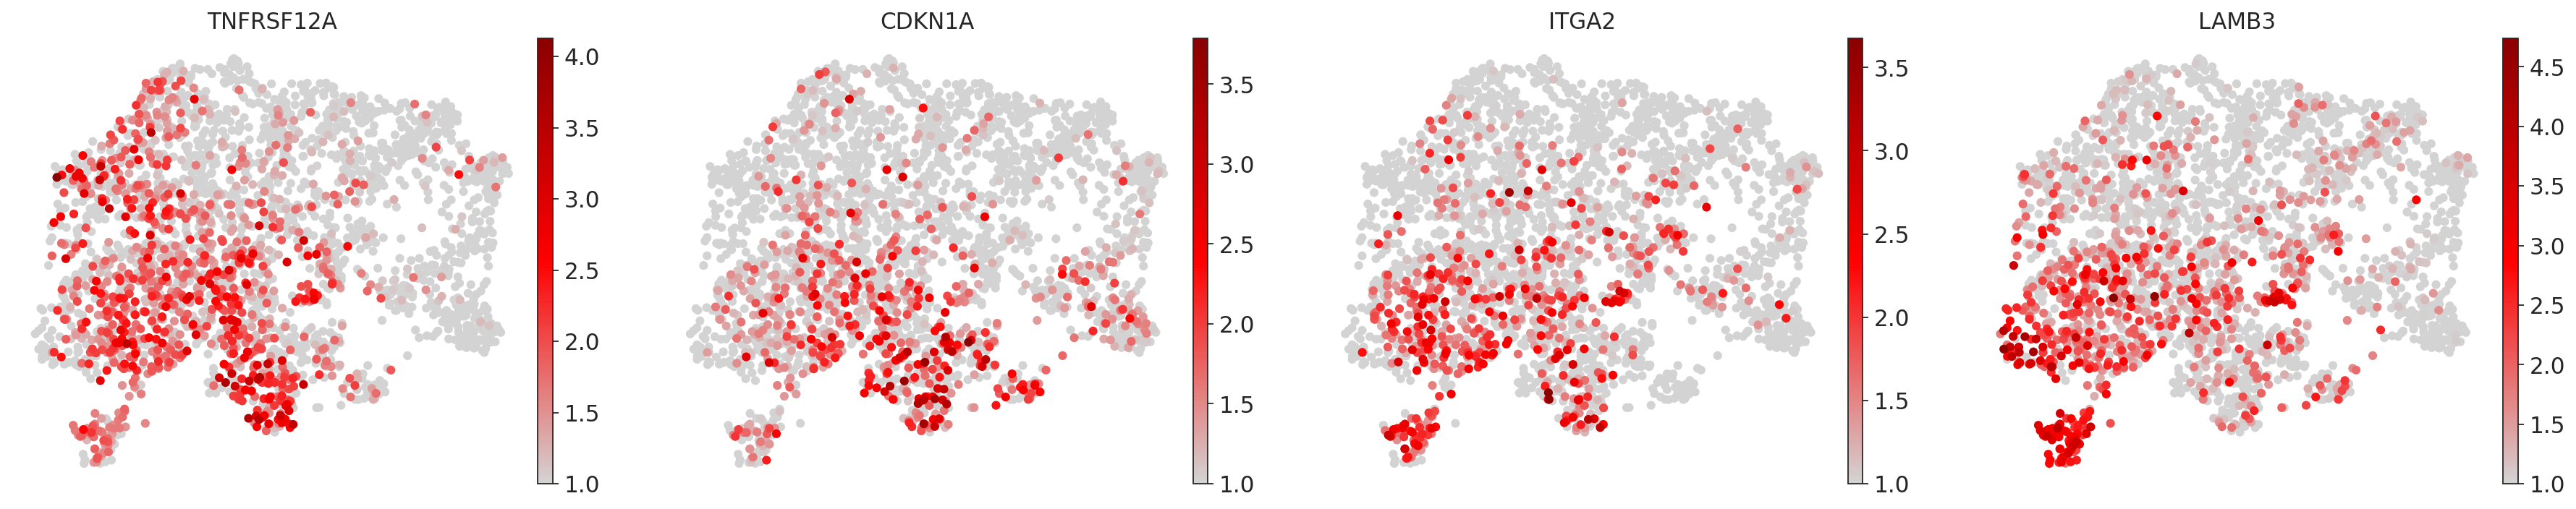

In [51]:
sc.pl.umap(adata, color = ['TNFRSF12A','CDKN1A','ITGA2','LAMB3'], 
           frameon = False, cmap = grey_red, ncols = 4,
           size = 120, vmin = 1,
           save = '_aberrant_basaloid_marker_2.pdf')